In [1]:
%cd /home/qiangzibro/stacked_capsule_autoencoders.pytorch/

/home/qiangzibro/stacked_capsule_autoencoders.pytorch


In [2]:
import torch
from model.models.ccae import CCAE
from data_loader.ccae_dataloader import CCAE_Dataloader
from model.loss import ccae_loss

In [3]:

B = 4
k = 7  # number of input set
dim_input = 2 # 2 for 2D point
dim_speical_features = 16
n_votes = 4
n_objects = 3

learning_rate = 1e-3
num_epochs = 15
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_loader= CCAE_Dataloader(batch_size=B)

In [4]:
model = CCAE(dim_input, n_objects, dim_speical_features, n_votes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

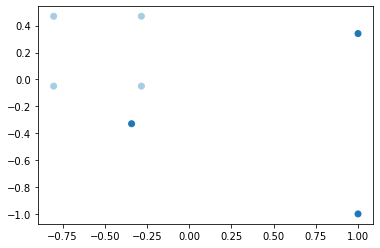

In [5]:
from data_loader.ccae_dataloader import  CCAE_Dataset
from utils.plot import plot_concellation

def test_ccae_dataset():
    dataset = CCAE_Dataset()  #which_patterns='all')
    plot_concellation(dataset[0])
test_ccae_dataset()

In [6]:
for i, x in enumerate(data_loader):
    print(x['corners'].shape)
    break

torch.Size([4, 7, 2])


In [9]:
# Start training
for epoch in range(num_epochs):
    for i, data in enumerate(data_loader):
        # Forward pass
        x = data['corners']
        x = x.to(device)
        res_dict = model(x)
        
        loss =ccae_loss(res_dict, x)
        
        # Backprop and optimize
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(loss)

RuntimeError: one of the variables needed for gradient computation has been modified by an inplace operation: [torch.cuda.FloatTensor [4, 16]], which is output 0 of SliceBackward, is at version 2; expected version 1 instead. Hint: enable anomaly detection to find the operation that failed to compute its gradient, with torch.autograd.set_detect_anomaly(True).